Here, we get the cycles from the signal using EMD library, define metrics on those cycles, then perform PCA on those metrics.
Using clustering we see if we can find some clusters and interesting shapes.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import custom functions
from scripts.functions import *

sns.set(style='white', context='notebook')

### Load data - Rat_1_OR_N

In [111]:
# Set path to LFP data and sleep state files
rat = '1'
region = 'PFC'
path_to_data = './data/OS_basic_separated/1/study_day_5_OR_N/'
data_file = 'Cleaned_Trial1_PFC_100_CH11.continuous.mat'
states_file = 'post_trial1_states_merged.mat'
data1, sleep_scoring1 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial2_PFC_100_CH11.continuous.mat'
states_file = 'post_trial2_2017-10-03_12-00-20_1-states.mat'
data2, sleep_scoring2 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial3_PFC_100_CH11.continuous.mat'
states_file = 'post_trial3_2017-10-03_12-53-38-states.mat'
data3, sleep_scoring3 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial4_PFC_100_CH11.continuous.mat'
states_file = 'post_trial4_2017-10-03_13-45-43-states.mat'
data4, sleep_scoring4 = load_mat_data(path_to_data, data_file, states_file)

data_file = 'Cleaned_Trial5_PFC_100_CH11_3.continuous.mat'
states_file = 'post_trial5_2017-10-03_15-12-56_2-states.mat'
data5, sleep_scoring5 = load_mat_data(path_to_data, data_file, states_file)

In [113]:
# Z-scoring
data1 = (data1 - np.mean(data1)) / np.std(data1)
data2 = (data2 - np.mean(data2)) / np.std(data2)
data3 = (data3 - np.mean(data3)) / np.std(data3)
data4 = (data4 - np.mean(data4)) / np.std(data4)
data5 = (data5 - np.mean(data5)) / np.std(data5)

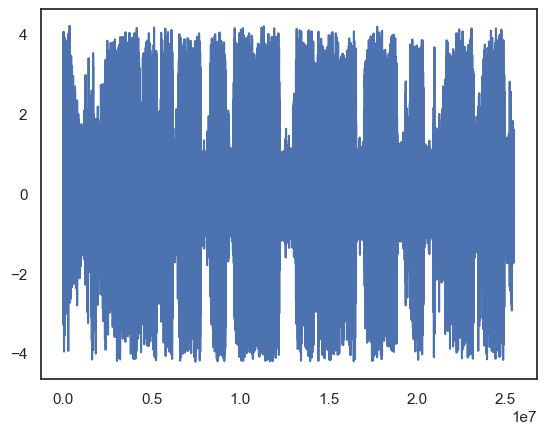

In [114]:
plt.plot(data5);

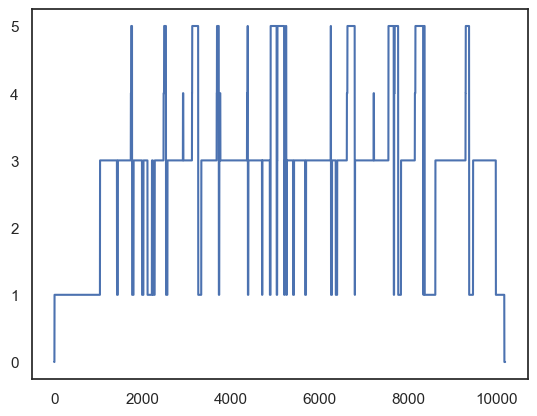

In [116]:
plt.plot(sleep_scoring5);

In [119]:
# Samping frequency
len(data5)/len(sleep_scoring5)

2500.212260912212

In [121]:
# Set sampling frequency
fs = 2500

### Select Non-REM data

In [124]:
# Get Non-REM epochs (sleep_state == 3)
nrem_epochs1 = np.array(get_sleep_state_epochs(sleep_scoring1, 3))
nrem_epochs2 = np.array(get_sleep_state_epochs(sleep_scoring2, 3))
nrem_epochs3 = np.array(get_sleep_state_epochs(sleep_scoring3, 3))
nrem_epochs4 = np.array(get_sleep_state_epochs(sleep_scoring4, 3))
nrem_epochs5 = np.array(get_sleep_state_epochs(sleep_scoring5, 3))

In [13]:
nrem_filtered_data1, nrem_data1 = get_nrem_filtered(data1, nrem_epochs1, fs=fs)
nrem_filtered_data2, nrem_data2 = get_nrem_filtered(data2, nrem_epochs2, fs=fs)
nrem_filtered_data3, nrem_data3 = get_nrem_filtered(data3, nrem_epochs3, fs=fs)
nrem_filtered_data4, nrem_data4 = get_nrem_filtered(data4, nrem_epochs4, fs=fs)
nrem_filtered_data5, nrem_data5 = get_nrem_filtered(data5, nrem_epochs5, fs=fs)

C:\anaconda3\Lib\site-packages\neurodsp\filt\utils.py:90: RuntimeWarning: divide by zero encountered in log10
  db = 20 * np.log10(abs(h_vals))


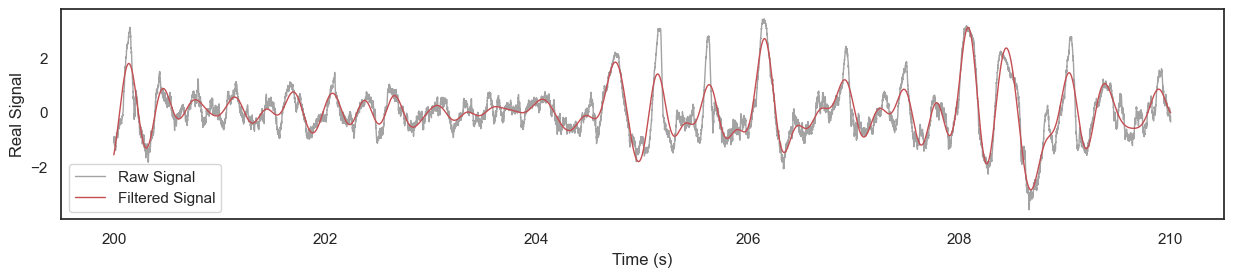

In [22]:
# Plot NREM filtered data (10 sec window)
start = fs*200 # Start position for signal
length = 10

t = (np.arange(fs*length) / fs) + 200
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(t,nrem_data5[start:start+fs*length], 'k', label='Raw Signal', alpha=0.4, lw=1)
plt.plot(t,nrem_filtered_data5[start:start+fs*length], 'r', label='Filtered Signal', lw=1)
plt.xlabel('Time (s)')
plt.ylabel('Real Signal')
plt.legend();

### Get Cycles

In [24]:
# Extract Instantaneous phase (IP), frequency and amplitude (from Hilbert Transform)
# IP1, IF1, IA1 = emd.spectra.frequency_transform(nrem_filtered_data1, fs, 'hilbert')
IP2, IF2, IA2 = emd.spectra.frequency_transform(nrem_filtered_data2, fs, 'hilbert')
IP3, IF3, IA3 = emd.spectra.frequency_transform(nrem_filtered_data3, fs, 'hilbert')
IP4, IF4, IA4 = emd.spectra.frequency_transform(nrem_filtered_data4, fs, 'hilbert')
IP5, IF5, IA5 = emd.spectra.frequency_transform(nrem_filtered_data5, fs, 'hilbert')

# Get cycles using IP
# C1 = emd.cycles.Cycles(IP1)
C2 = emd.cycles.Cycles(IP2)
C3 = emd.cycles.Cycles(IP3)
C4 = emd.cycles.Cycles(IP4)
C5 = emd.cycles.Cycles(IP5)

 Checking Cycles inputs - trimming singleton from input 'IP'
 Checking Cycles inputs - trimming singleton from input 'IP'
 Checking Cycles inputs - trimming singleton from input 'IP'
 Checking Cycles inputs - trimming singleton from input 'IP'


In [27]:
# cycles1 = get_cycles_with_metrics(C1, nrem_filtered_data1, IA1, IF1)
cycles2 = get_cycles_with_metrics(C2, nrem_filtered_data2, IA2, IF2)
cycles3 = get_cycles_with_metrics(C3, nrem_filtered_data3, IA3, IF3)
cycles4 = get_cycles_with_metrics(C4, nrem_filtered_data4, IA4, IF4)
cycles5 = get_cycles_with_metrics(C5, nrem_filtered_data5, IA5, IF5)

In [28]:
# all_cycles1 = get_cycles_with_conditions(cycles1, conditions1)
all_cycles2 = get_cycles_with_conditions(cycles2, 'is_good==1')
all_cycles3 = get_cycles_with_conditions(cycles3, 'is_good==1')
all_cycles4 = get_cycles_with_conditions(cycles4, 'is_good==1')
all_cycles5 = get_cycles_with_conditions(cycles5, 'is_good==1')

In [55]:
# cycles1.compute_cycle_timings()
all_cycles2.compute_cycle_timings()
all_cycles3.compute_cycle_timings()
all_cycles4.compute_cycle_timings()
all_cycles5.compute_cycle_timings()

In [107]:
# all_metrics1 = all_cycles1.get_metric_dataframe(subset=True)
metrics2 = all_cycles2.get_metric_dataframe(subset=True)
metrics3 = all_cycles3.get_metric_dataframe(subset=True)
metrics4 = all_cycles4.get_metric_dataframe(subset=True)
metrics5 = all_cycles5.get_metric_dataframe()
all_metrics = pd.concat([metrics2, metrics3, metrics4, metrics5])

In [109]:
all_cycles5

,is_good,start_sample,stop_sample,duration,duration_samples,peak2trough,asc2desc,max_amp,trough_values,peak_values,mean_if,max_if,range_if,trough_position,peak_position,chain_ind
0,0,0,518,519,519,NaN,NaN,0.502426,-0.437617,-0.000322,2.149672,17.978461,16.135012,248,518,-1
1,0,519,2287,1769,1769,0.641642,0.614279,0.522062,-0.384492,0.257050,1.412705,2.010676,3.752760,1516,833,-1
2,0,2288,2754,467,467,NaN,NaN,0.522962,0.000816,0.363751,0.002964,1.963290,21.161947,466,217,-1
3,0,2755,2860,106,106,NaN,NaN,0.341185,-0.036710,-0.000437,-0.017960,1.685825,8.496698,55,0,-1
4,1,2861,3984,1124,1124,0.525531,0.591074,1.184782,-0.716468,1.093354,2.225873,3.090193,1.397081,799,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13501,1,16561700,16562493,794,794,0.572556,0.518965,0.466344,-0.277387,0.465629,3.147471,3.875160,1.275087,616,234,2608
13502,1,16562494,16563238,745,745,0.413964,0.488217,0.682862,-0.439398,0.220146,3.358441,4.368336,2.282286,538,157,2608
13503,1,16563239,16564401,1163,1163,0.653927,0.444358,0.746999,-0.122225,0.708506,2.147275,7.755263,6.340090,948,302,2608
13504,0,16564402,16566261,1860,1860,0.399349,0.333759,0.244703,-0.188551,0.176998,1.345814,6.740850,7.673477,1585,346,-1


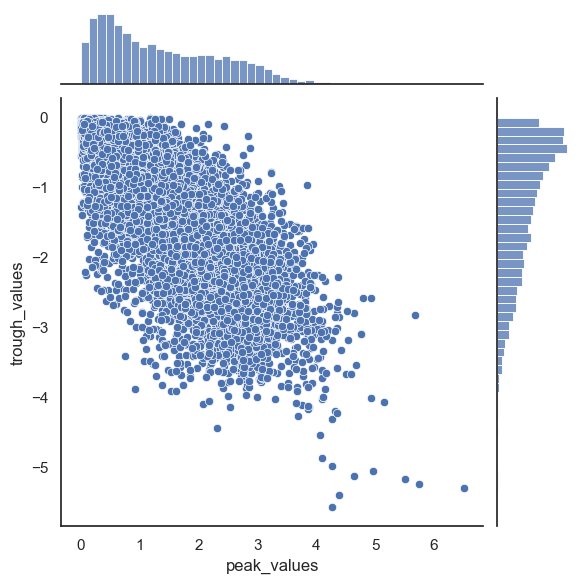

In [59]:
# Plot peak vs trough values
sns.jointplot(x=all_metrics['peak_values'], y=all_metrics['trough_values'], kind='scatter');

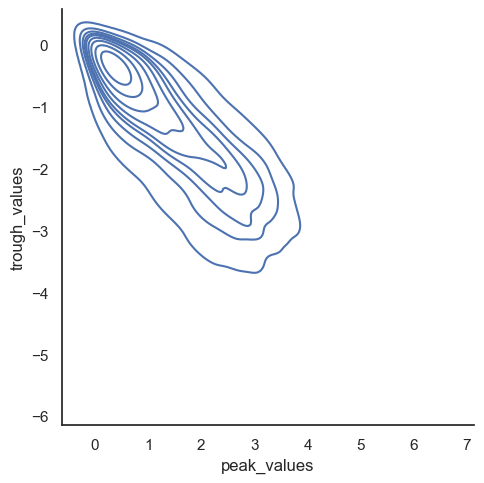

In [31]:
sns.displot(all_metrics, x="peak_values", y="trough_values", kind="kde");

In [32]:
# all_waveforms1, _ = emd.cycles.phase_align(IP1, nrem_filtered_data1,
#                                                             cycles=all_cycles1.iterate(through='subset'), npoints=100)
all_waveforms2, _ = emd.cycles.phase_align(IP2, nrem_filtered_data2,
                                                            cycles=all_cycles2.iterate(through='subset'), npoints=128)
all_waveforms3, _ = emd.cycles.phase_align(IP3, nrem_filtered_data3,
                                                            cycles=all_cycles3.iterate(through='subset'), npoints=128)
all_waveforms4, _ = emd.cycles.phase_align(IP4, nrem_filtered_data4,
                                                            cycles=all_cycles4.iterate(through='subset'), npoints=128)
all_waveforms5, _ = emd.cycles.phase_align(IP5, nrem_filtered_data5,
                                                            cycles=all_cycles5.iterate(through='subset'), npoints=128)

 Checking phase_align inputs - trimming singleton from input 'ip'
 Checking phase_align inputs - trimming singleton from input 'ip'
 Checking phase_align inputs - trimming singleton from input 'ip'
 Checking phase_align inputs - trimming singleton from input 'ip'


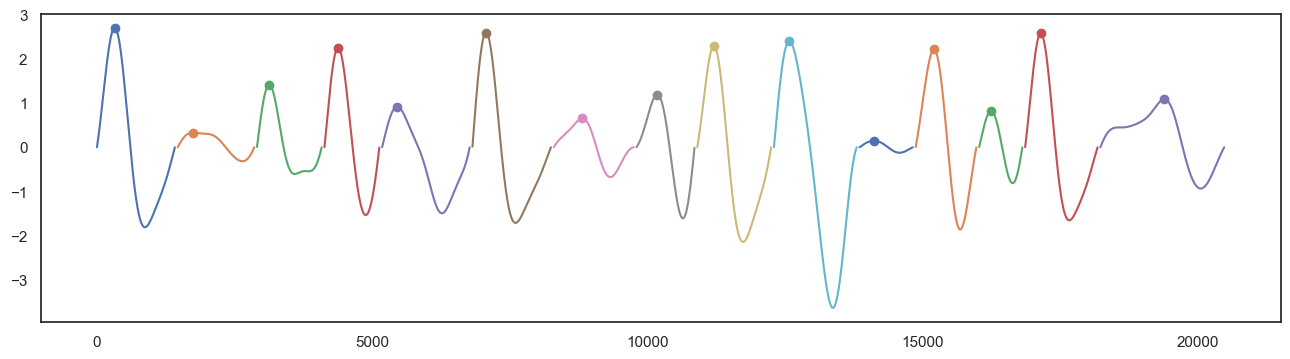

In [33]:
# Plot some exmaples of good cycles
cycles_to_plot = np.random.choice(metrics5['index'], 15)
plt.figure(figsize=(16,4))
start = 0
for ii in cycles_to_plot:
  inds = cycles5.get_inds_of_cycle(ii)
  cycle = nrem_filtered_data5[inds]
  row = metrics5[metrics5['index'] == ii]
  xinds = np.arange(len(inds)) + start
  plt.plot(xinds, cycle)
  plt.scatter(row['peak_position']+start, row['peak_values'])

  start += len(inds)+50

In [65]:
columns = ['index', 'start_sample', 'duration_samples', 'peak2trough', 'asc2desc', 'max_amp', 'peak_values', 'trough_values', 'mean_if', 'max_if', 'range_if']

# df1 = pd.concat([all_metrics1[columns], pd.DataFrame(all_waveforms1.T)], axis=1)
# df1['post-trial'] = 1
df2 = pd.concat([metrics2[columns].reset_index(), pd.DataFrame(all_waveforms2.T)], axis=1)
df2['post-trial'] = 2
df3 = pd.concat([metrics3[columns].reset_index(), pd.DataFrame(all_waveforms3.T)], axis=1)
df3['post-trial'] = 3
df4 = pd.concat([metrics4[columns].reset_index(), pd.DataFrame(all_waveforms4.T)], axis=1)
df4['post-trial'] = 4
df5 = pd.concat([metrics5[columns].reset_index(), pd.DataFrame(all_waveforms5.T)], axis=1)
df5['post-trial'] = 5

In [67]:
all_data = pd.concat([df2, df3, df4, df5])
all_data.columns = all_data.columns.astype('str')

In [69]:
all_data

,level_0,index,start_sample,duration_samples,peak2trough,asc2desc,max_amp,peak_values,trough_values,mean_if,...,119,120,121,122,123,124,125,126,127,post-trial
0,0,1,488,969,0.550307,0.519676,1.245168,1.231398,-0.897916,2.579322,...,-0.326002,-0.288296,-0.250221,-0.211839,-0.173282,-0.134636,-0.095982,-0.057435,-0.019078,2
1,1,2,1457,817,0.486685,0.472428,1.561627,0.674648,-1.002326,3.059675,...,-0.560890,-0.505678,-0.447356,-0.386007,-0.321743,-0.254664,-0.184929,-0.112691,-0.038108,2
2,2,3,2274,1109,0.501800,0.494698,2.116921,2.074982,-1.762939,2.254350,...,-0.654443,-0.579620,-0.503848,-0.427293,-0.350132,-0.272537,-0.194680,-0.116730,-0.038856,2
3,3,4,3383,1049,0.468853,0.538484,1.581426,1.523305,-1.113560,2.383435,...,-0.292006,-0.254330,-0.217396,-0.181279,-0.146054,-0.111780,-0.078513,-0.046292,-0.015155,2
4,4,5,4432,872,0.548948,0.495442,0.853625,0.444940,-0.694198,2.865991,...,-0.324991,-0.290676,-0.255170,-0.218544,-0.180862,-0.142184,-0.102581,-0.062126,-0.020889,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,8087,13499,16559867,758,0.509293,0.522870,0.835519,0.528687,-0.582918,3.297764,...,-0.315870,-0.283451,-0.249496,-0.214116,-0.177431,-0.139575,-0.100691,-0.060930,-0.020454,5
8088,8088,13500,16560625,1075,0.601743,0.399245,0.856087,0.728734,-0.263594,2.325836,...,-0.137858,-0.124142,-0.109709,-0.094572,-0.078757,-0.062288,-0.045199,-0.027522,-0.009301,5
8089,8089,13501,16561700,794,0.572556,0.518965,0.466344,0.465629,-0.277387,3.147471,...,-0.100424,-0.088939,-0.077313,-0.065562,-0.053718,-0.041808,-0.029858,-0.017898,-0.005955,5
8090,8090,13502,16562494,745,0.413964,0.488217,0.682862,0.220146,-0.439398,3.358441,...,-0.249881,-0.224994,-0.198726,-0.171155,-0.142354,-0.112408,-0.081411,-0.049464,-0.016673,5


### PCA

In [303]:
pca_df = all_data[['duration_samples', 'peak2trough', 'asc2desc', 'max_amp', 'peak_values', 'trough_values', 'mean_if', 'max_if', 'range_if']]

In [305]:
scaled_data = StandardScaler().fit_transform(pca_df)

pca = PCA(n_components=5)
pca.fit(scaled_data)
components = pd.DataFrame(pca.transform(scaled_data))
components.columns = [f'PC-{i}' for i in range(1,6)]

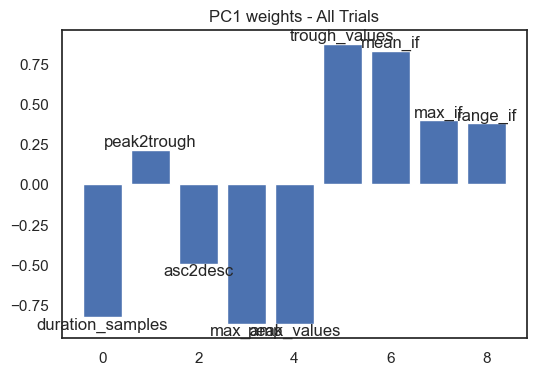

In [307]:
plt.figure(figsize=(6, 4), facecolor="white")
component = 1
pca_weights = (pca.components_.T * np.sqrt(pca.explained_variance_))[:, component-1]
pca_weights = pca_weights
p = plt.bar(range(len(pca_weights)), pca_weights)
plt.bar_label(p, list(pca_df.columns));
plt.title(f"PC{component} weights - All Trials");
# plt.savefig(f'Component{component}-13-CN-all-trials.svg')

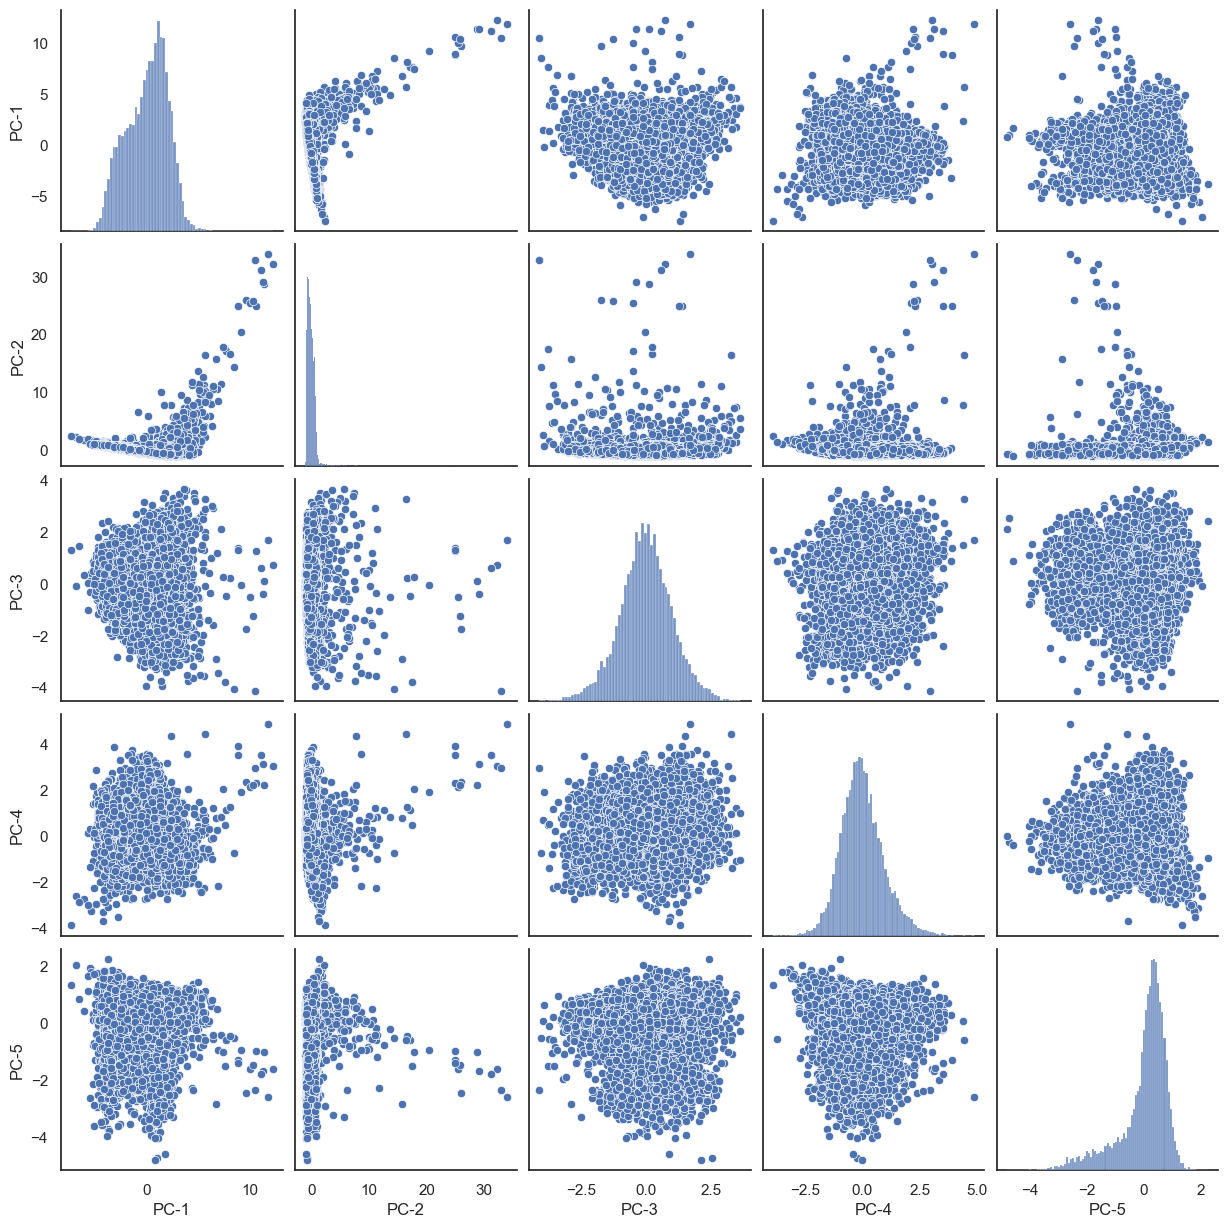

In [309]:
sns.pairplot(components);

### K-Means Clustering

In [311]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(components)

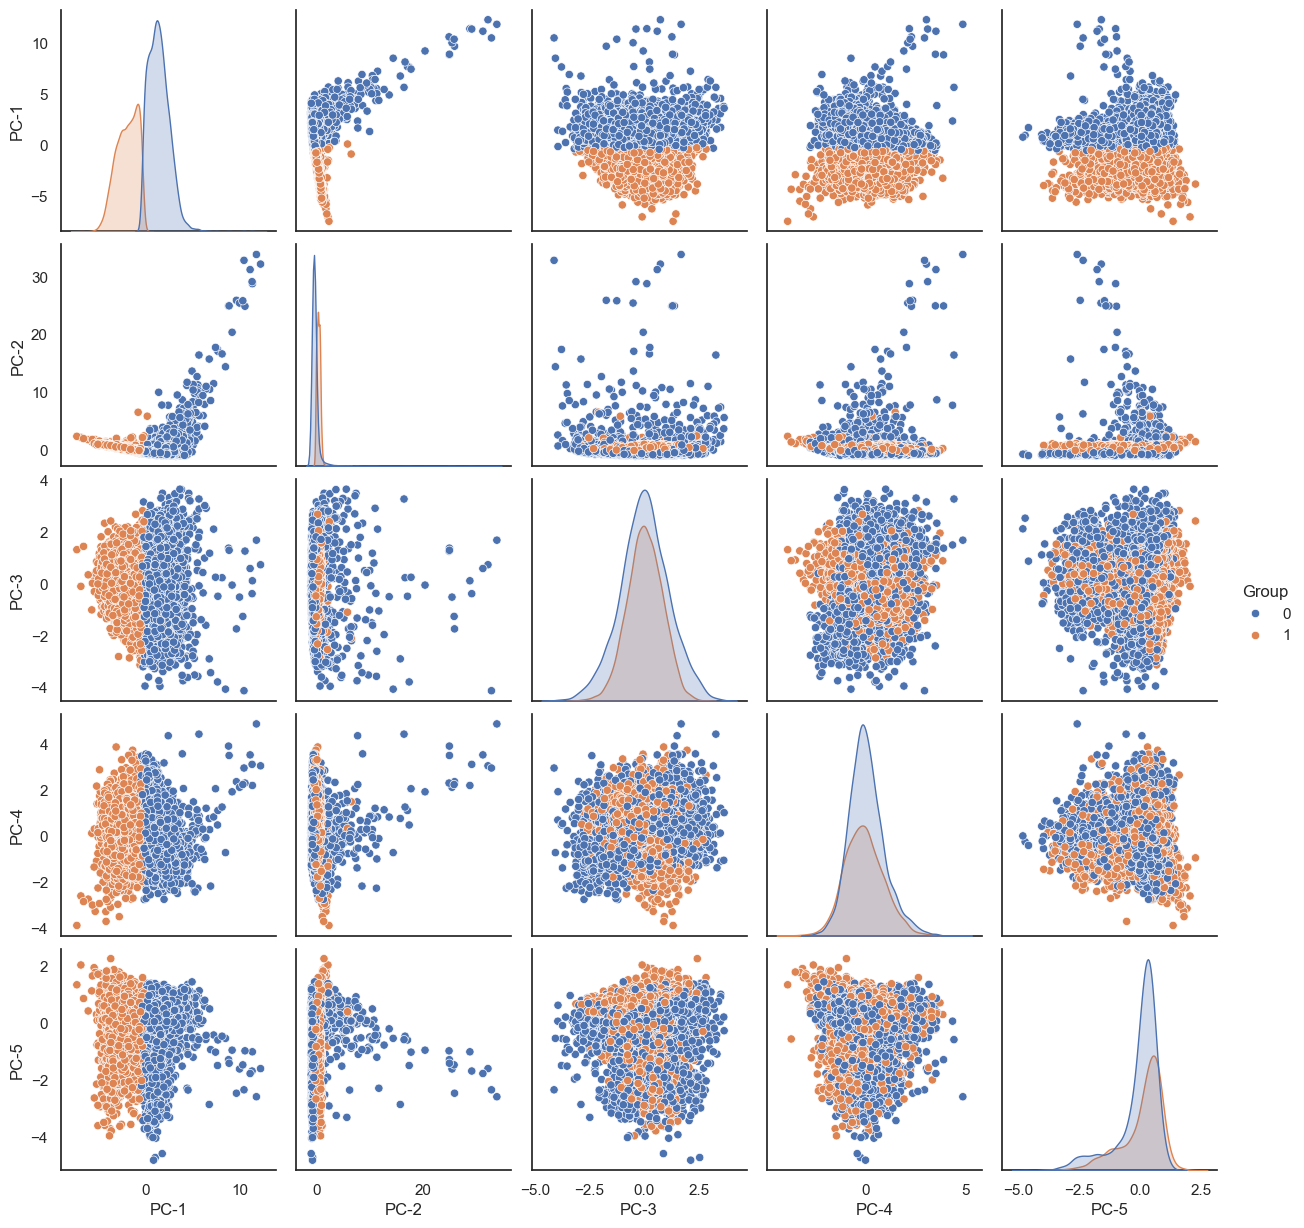

In [313]:
y_pred = kmeans.predict(components)
df = pd.concat([components, pd.DataFrame({"Group": y_pred})], axis=1)
sns.pairplot(df, hue='Group');
# plt.savefig(f'PC-Kmeans-13-CN-{peak} {trough}.svg')

In [315]:
new_df_copy = all_data.copy()
new_df_copy.loc[:, 'cluster'] = y_pred

In [317]:
cluster0_data = new_df_copy[new_df_copy['cluster'] == 0]
cluster1_data = new_df_copy[new_df_copy['cluster'] == 1]
cluster1_data

,level_0,index,duration_samples,peak2trough,asc2desc,max_amp,peak_values,trough_values,mean_if,max_if,...,120,121,122,123,124,125,126,127,post-trial,cluster
2,2,3,1109,0.501800,0.494698,2.116921,2.074982,-1.762939,2.254350,2.581014,...,-0.579620,-0.503848,-0.427293,-0.350132,-0.272537,-0.194680,-0.116730,-0.038856,2,1
5,5,6,964,0.419440,0.524592,2.261146,1.216389,-2.196087,2.595272,3.428030,...,-0.807045,-0.701935,-0.595434,-0.487883,-0.379621,-0.270989,-0.162324,-0.053963,2,1
9,9,11,1064,0.519744,0.567538,2.172259,1.842910,-1.839647,2.348249,2.584656,...,-0.500117,-0.430965,-0.362290,-0.294256,-0.227015,-0.160715,-0.095501,-0.031502,2,1
25,25,30,1172,0.434529,0.558673,2.018310,1.947461,-1.246787,2.132724,3.078042,...,-0.381367,-0.333812,-0.285115,-0.235341,-0.184556,-0.132836,-0.080262,-0.026924,2,1
33,33,39,1273,0.448923,0.563100,1.613388,1.458671,-1.504783,1.963994,2.330160,...,-0.529630,-0.461437,-0.392143,-0.321934,-0.251006,-0.179557,-0.107792,-0.035915,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,8079,13477,1297,0.491434,0.612519,3.119232,2.842689,-2.162218,1.926940,2.088338,...,-0.262609,-0.213294,-0.168173,-0.127384,-0.091033,-0.059215,-0.032001,-0.009476,5,1
8083,8083,13493,1237,0.267491,0.637050,1.724442,0.522003,-1.680014,2.019709,8.602134,...,-0.304152,-0.249412,-0.198688,-0.152719,-0.112266,-0.077130,-0.045413,-0.015056,5,1
8084,8084,13494,1313,0.486332,0.569095,1.803405,0.925376,-1.801557,1.904203,2.299287,...,-0.602003,-0.521660,-0.440939,-0.360066,-0.279264,-0.198744,-0.118710,-0.039360,5,1
8085,8085,13495,1244,0.437243,0.538332,1.846583,1.400317,-1.844712,2.008849,2.469613,...,-0.565776,-0.484244,-0.403723,-0.324676,-0.247572,-0.172888,-0.101109,-0.032741,5,1


(0.0, 2000.0)

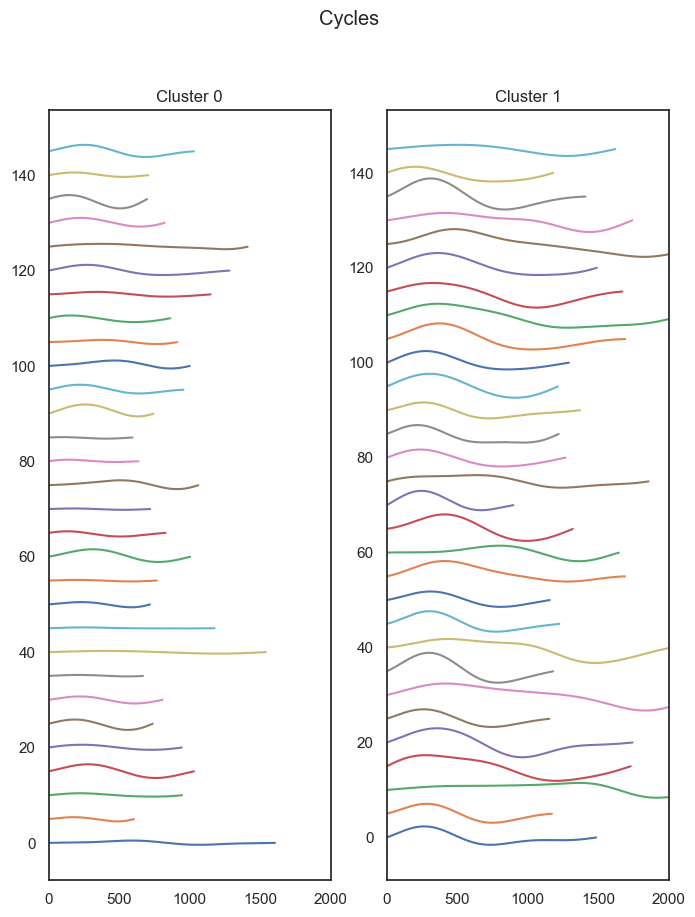

In [319]:
plt.figure(figsize=(8,10))
plt.suptitle("Cycles")

plt.subplot(1, 2, 1)
plt.title('Cluster 0')

start = 0
cluster0_sample = cluster0_data.sample(n=30)
for index, row in cluster0_sample.iterrows():
    if row['post-trial'] == 1:
        inds = all_cycles1.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data1[inds]
    if row['post-trial'] == 2:
        inds = all_cycles2.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data2[inds]
    if row['post-trial'] == 3:
        inds = all_cycles3.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data3[inds]
    if row['post-trial'] == 4:
        inds = all_cycles4.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data4[inds]
    if row['post-trial'] == 5:
        inds = all_cycles5.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data5[inds]
    plt.plot(cycle+start)
    start += 5
plt.xlim((0, 2000))


plt.subplot(1, 2, 2)
plt.title('Cluster 1')

start = 0
cluster1_sample = cluster1_data.sample(n=30)
for index, row in cluster1_sample.iterrows():
    if row['post-trial'] == 1:
        inds = all_cycles1.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data1[inds]
    if row['post-trial'] == 2:
        inds = all_cycles2.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data2[inds]
    if row['post-trial'] == 3:
        inds = all_cycles3.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data3[inds]
    if row['post-trial'] == 4:
        inds = all_cycles4.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data4[inds]
    if row['post-trial'] == 5:
        inds = all_cycles5.get_inds_of_cycle(row['index'])
        cycle = nrem_filtered_data5[inds]
    plt.plot(cycle+start)
    start += 5
plt.xlim((0, 2000))
# plt.savefig(f'PCA_Cluster_waveforms.png');

### SO and Delta Cycles

In [321]:
trough = 60
peak = 80
delta_peak = 40

peak_thresh = np.percentile(all_data['peak_values'], peak)
trough_thresh = np.percentile(all_data['trough_values'], trough)
delta_peak_thresh = np.percentile(all_data['peak_values'], delta_peak)

lo_freq_duration = fs/0.1
hi_freq_duration = fs/4

In [331]:
so_cycles = all_data[(all_data['peak_values'] >= peak_thresh) &
         (all_data['trough_values'] <= trough_thresh) &
         (all_data['duration_samples'] <= lo_freq_duration) &
         (all_data['duration_samples'] >= hi_freq_duration)]
delta_cycles = all_data[(all_data['peak_values'] < peak_thresh) &
         (all_data['trough_values'] <= trough_thresh) &
         (all_data['duration_samples'] <= lo_freq_duration) &
         (all_data['duration_samples'] >= hi_freq_duration)]
big_delta_cycles = all_data[(all_data['peak_values'] < peak_thresh) &
         (all_data['trough_values'] <= trough_thresh) &
         (all_data['duration_samples'] <= lo_freq_duration) &
         (all_data['duration_samples'] >= hi_freq_duration) &
         (all_data['peak_values'] >= delta_peak_thresh)]
small_delta_cycles = all_data[(all_data['peak_values'] < peak_thresh) &
         (all_data['trough_values'] <= trough_thresh) &
         (all_data['duration_samples'] <= lo_freq_duration) &
         (all_data['duration_samples'] >= hi_freq_duration) &
         (all_data['peak_values'] < delta_peak_thresh)]

In [345]:
all_data = all_data.reset_index(drop=True)
so_cycles = so_cycles.reset_index(drop=True)
delta_cycles = delta_cycles.reset_index(drop=True)
big_delta_cycles = big_delta_cycles.reset_index(drop=True)
small_delta_cycles = small_delta_cycles.reset_index(drop=True)

(-10.0, 70.0)

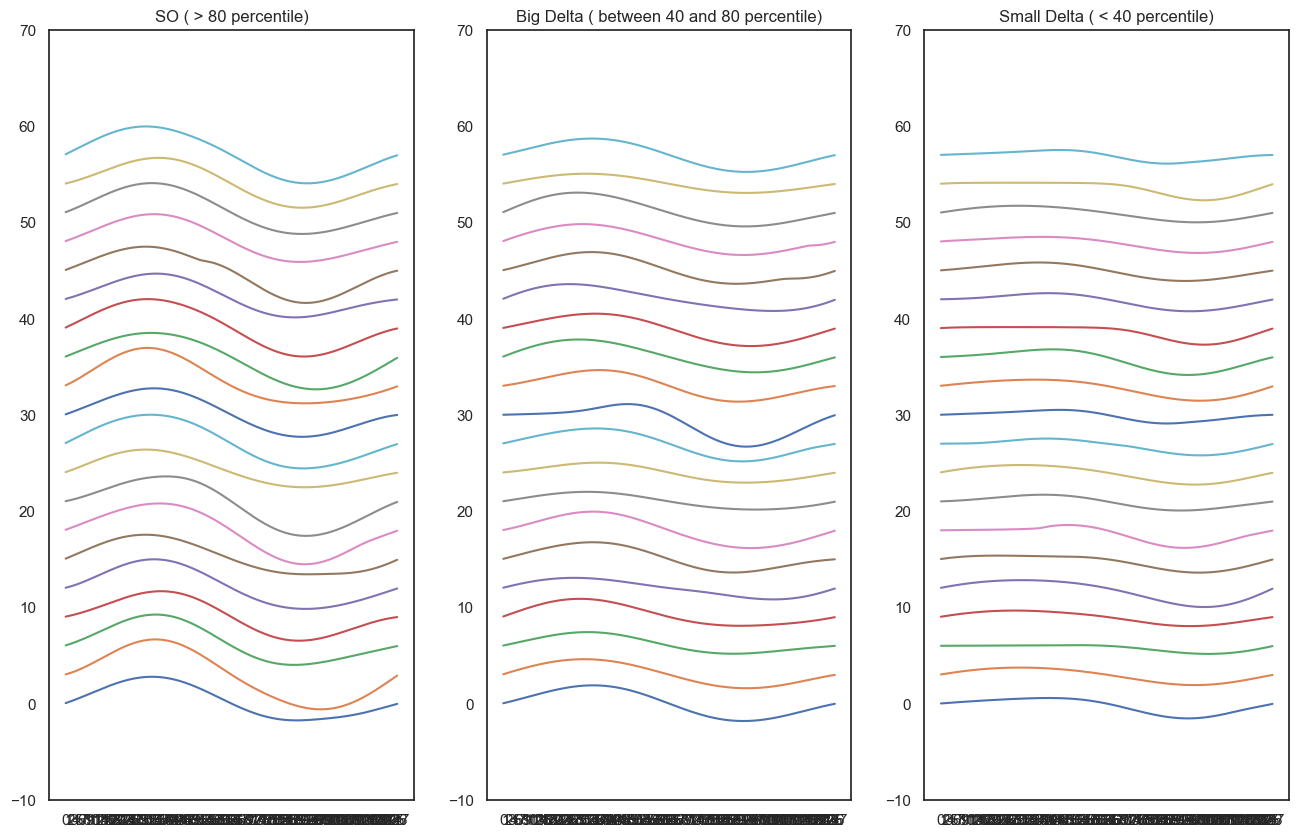

In [415]:
plt.figure(figsize=(16,10), facecolor='white')
# plt.suptitle("OS-basic-13-CN data")
plt.subplot(1, 3, 1)
plt.title('SO ( > 80 percentile)')
# plt.yticks([])
start = 0
cycles_to_plot = np.random.randint(1, so_cycles.shape[0], 20)
for i in cycles_to_plot:
  plt.plot(so_cycles.iloc[i, 11:11+128]+start)
  start += 3
plt.ylim((-10, 70))

plt.subplot(1, 3, 2)
plt.title('Big Delta ( between 40 and 80 percentile)')
# plt.yticks([])
start = 0
cycles_to_plot = np.random.randint(1, big_delta_cycles.shape[0], 20)
for i in cycles_to_plot:
  plt.plot(big_delta_cycles.iloc[i, 11:11+128]+start)
  start += 3
plt.ylim((-10, 70))

plt.subplot(1, 3, 3)
plt.title('Small Delta ( < 40 percentile)')
# plt.yticks([])
start = 0
cycles_to_plot = np.random.randint(1, small_delta_cycles.shape[1], 20)
for i in cycles_to_plot:
  plt.plot(small_delta_cycles.iloc[i, 11:11+128]+start)
  start += 3
plt.ylim((-10, 70))

# plt.savefig('Phase-align-cycles.svg')